# Applied Machine Learning - Homework 1

*I pledge my Honor that I have abided by the Stevens Honor System.* - Joshua Schmidt 2/23/21

### 1. Explain the following concepts:

1. supervised learning

In machine learning, there are two main types of learning - supervised and unsupervised. In supervised learning, there is labeled data - a "ground-truth" - and we know in advance what the desired value of the output should be. This labeled data is used to train and test the model. Supervised learning is typically used in classification or regression tasks.

2. unsupervised learning

Unsupervised learning is the opposite of supervised learning. There is no labeled output, so its goal is to learn the underlying structure of the input data. Because there is no ground-truth, tasks such as clustering are difficult to execute. Unsupervised learning is typically used for k-means clustering, principal component analysis, and autoencoders (clustering and dimension reduction).

3. online learning

Typically, machine learning models are trained and tested only once, producing a static model that will be used for a given task. Problems arise when the model needs to be retrained, and there is a fair amount of technical debt associated with maintaining and updating datasets. Online machine learning uses a stream of data to train the model continously. Because it is always updating, there is no necessity to save large datasets and retrain the model. Online learning solves these problems, but introduces new ones, due to the complexity of keeping the model performant and updating.

4. batch learning

In batch learning, the training and testing datasets are split into smaller groups, or batches, as opposed to training over the entire dataset in one run. It is different from online learning in that batch learning is typically run "offline", without a continuous stream of input data (and the benefits / drawbacks associated). Most machine learning algorithms are batch learning.

5. model-based learning

Model-based learning refers to learning the optimal output for a given input through building a model of the environment, This type of learning does not aim to understand the environment in any meaningful way, but instead create a model that can be used to simulate the environment.

6. instance-based learning

Instance-based learning models are systems that learn and save training examples, then generalize these examples to new training data (new instances). In essense, instance-based learning involves building a hypothesis from training instances. It is also sometimes referred to as lazy-learning, or memory-based learing.

### 2. Programming

Estimate the parameters for a known polynomial using the `polyfit()` function.

In [128]:
# imports

import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from typing import Tuple, List


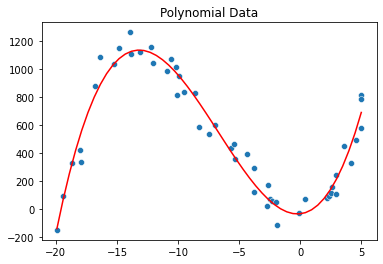

In [129]:
# 1. plot

def generate_data(noise_scale: int, number_of_samples: int) -> Tuple[np.array, np.array]:
    """
    generate noisy polynomial data
    """
    x =  (25 * (np.random.rand(number_of_samples, 1) - 0.8))
    y = (5 * x + 20 * x**2 + 1 * x**3 + noise_scale * np.random.randn(number_of_samples, 1))
    # sort the values:
    x, y = map(lambda val: np.array(val), zip(*sorted(zip(x[:,0], y[:,0]), key=lambda elem: elem[0])))
    return x, y

def get_prediction(x: np.array, y: np.array, degree: int) -> Tuple[np.array, np.array]:
    """
    get x and y values for polynomial fit
    """
    coefficients = np.polyfit(x, y, degree)
    x_2 = np.linspace(min(x), max(x))
    polynomial = np.poly1d(coefficients)
    y_2 = polynomial(x_2)
    return x_2, y_2

def plot_polynomial(noise_scale: int, number_of_samples: int, m: int, title: str) -> None:
    """
    plot polynomial data
    """
    x, y = generate_data(noise_scale, number_of_samples)
    sns.scatterplot(x=x, y=y).set(title=title)

    x_2, y_2 = get_prediction(x, y, m)
    plt.plot(x_2, y_2, color='r')
    plt.show()

default_noise_scale = 100
default_number_of_samples = 50

plot_polynomial(default_noise_scale, default_number_of_samples, 3, 'Polynomial Data')


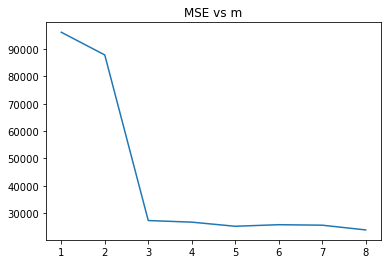

From the graph, it can be seen that after m = 3, the MSE stays pretty much flat. Therefore, 3 is the best choice of m.


In [130]:
# 2. MSE vs m

def plot_mse(all_m: List[int]) -> None:
    """
    plot the mse graph given all mse
    """
    x, y = generate_data(default_noise_scale, default_number_of_samples)
    mse = []

    for m in all_m:
        _, y_2 = get_prediction(x, y, m)
        current_mse = np.square(y - y_2).mean()
        mse.append(current_mse)

    sns.lineplot(x=all_m, y=mse).set(title='MSE vs m')
    plt.show()

plot_mse(list(range(1, 8 + 1)))

print('From the graph, it can be seen that after m = 3, the MSE stays pretty much flat. Therefore, 3 is the best choice of m.')

best_m = 3

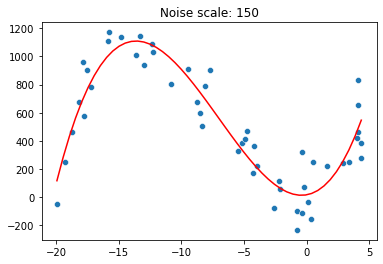

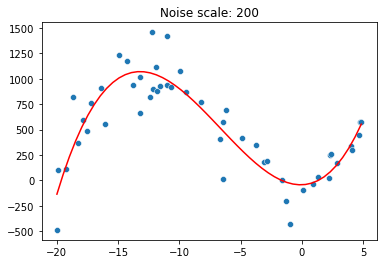

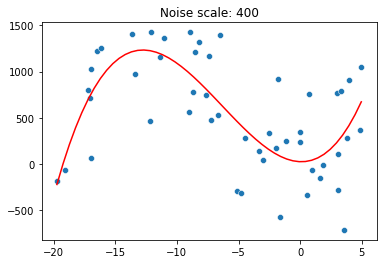

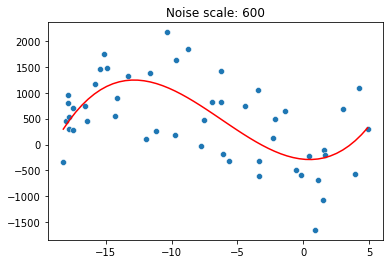

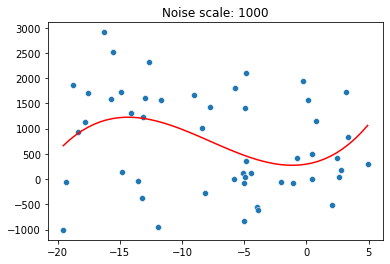

As noise scale increases, the MSE and the accuracy of the returned parameters decreases.


In [131]:
# 3. noise scale

def plot_noise_scale(all_noise_scale: List[int]) -> None:
    """
    plot all polynomials with noise scale
    """
    for current_noise_scale in all_noise_scale:
        plot_polynomial(current_noise_scale, default_number_of_samples, best_m, f'Noise scale: {current_noise_scale}')

plot_noise_scale([150, 200, 400, 600, 1000])

print('As noise scale increases, the MSE and the accuracy of the returned parameters decreases.')

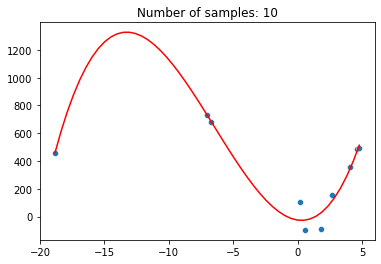

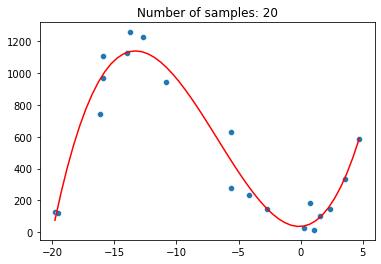

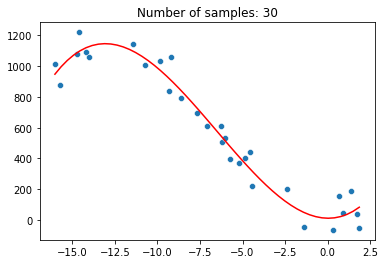

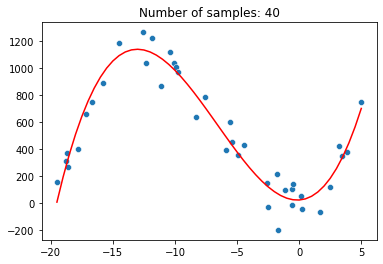

As number of samples increases, the MSE and the accuracy of the returned parameters increases.


In [132]:
# 4. number of samples

def plot_number_samples(all_number_of_samples: List[int]) -> None:
    """
    plot all polynomials with noise scale
    """
    for current_num_samples in all_number_of_samples:
        plot_polynomial(default_noise_scale, current_num_samples, best_m, f'Number of samples: {current_num_samples}')

plot_number_samples([10, 20, 30, 40])

print('As number of samples increases, the MSE and the accuracy of the returned parameters increases.')